# Information on How These Data Are Organized:

`TypeOfResponse` refers to whether participants pressed a button ("SCTResp") or did not press a button ("SCTRespITI") within the given time frame.

`Version` refers to the task version. I never changed the JS code; I merely changed which face/house was labeled as S1_1, S1_2, S1_3, or S1_4 in respective task folders.

`LogCounter` gets added to whenever the JS records a new datapoint.

`TrialCounter` gets added to whenever a new trial has started. This is reset at the start of each block.

`MatrixCounter` gets added to throughout the task and is never reset. It is what I use to call Stimuli #s.

`RunCounter` refers to the run: 0 is run 1, 1 is run 2.

`CongruentCounter` marks any time a congruent trial occurred; `IncongruentCounter` an incongruent trial.

`StimPresented` refers to which face or house was presented before the trial. This is in reference to the main manipulation of the S-CT test phase: we examine whether congruency effects are modulated through previously learned associations with the S2 control-demand cues. In expt 2, the S1-S2 pairs are scrambled, so these congruency effects should not be observed if our control transfer hypothesis is supported.

`StimProbAll` refers to my matrix of possible trial types. So it indicates whether "RED" will be shown in red, etc.

`TrialType` also marks incongruent/congruent trials.

`CongruentNumber` refers to my specially made matrices of my congruent trials. So there are 4 possible incongruent combinations, with 80 total congruent trials, and thus 20 occurrences of numbers 1-4.

`IncongruentNumber` refers to my specially made matrix of incongruent trials. There are 12 possible incongruent combinations, with 80 trial incongruent trials, and thus around 6 of each occurrence.

`PressCorrect` refers to the button that participants should press on that trial. This is how I define accuracy (i.e., correct: when PressCorrect = actualkeyPressed).

`ResponseMatrix` refers to which key is pressed; this is a redundant variable and was used to make sure that each key had been required an equal number of times throughout the task.

`ActualKeyPressed` is what key subjects pressed.

`Accuracy` & `RT` self-explanatory.

`FeedbackType` refers to whether they got correct as fb, incorrect as fb, or the fb time-out.

`runStart` refers to the initiation of the countdown to begin the task.

`ImagePresent` refers to when scene was presented.

`StimTime` refers to when the color word was presented.

`RespOnset` refers to when a response was made.

`AccCount` is how I give subjects accurate fb of their performance at the end of each run (i.e., a counter that gets added to after each correct trial & is divided by trial #).

`Subject` self-explanatory.

Some other labels aren't coded in the JS: `Sequential` refers to whether a trial was the same (0) as before, changed to incongruent or congruent on the next trial, etc., and `StimRep` looks for direct repetitions in the StimProbAll matrix. These were coded in Matlab and added to the CSV file.

---

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as plb
import math
from scipy import stats

%matplotlib notebook 

In [176]:
%cd 'C:\Users\cb383\Documents\controltransfer\expt2\data'
dat = pd.read_csv('AllSubsSCT.csv')

C:\Users\cb383\Documents\controltransfer\expt2\data


# Do some basic cleaning

#### We are filtering and preparing the data for analysis.

<u>FOR REACTION TIMES</u>:

-Select only `TypeOfResponse` equal to `Resp` (`ITI Resp` is when subs didn't respond).

-Only take the RTs that are greater than 200ms and less than 1000 ms.

-Only take the RTs on accurate trials.

-Only take trials where the stimulus didn't repeat.


<u>FOR ACCURACY</u>:

-All errors are errors

In [177]:
cdat = dat.query('(TypeOfResponse != "SCTRespITI") & (RT > 200) & (RT < 1000) & (Accuracy != 0) & (StimRep != 1)').copy()
adat = dat.copy()

#### Now I'm making columns in the data based off my variables so that analysis will be easier.

In [178]:
adat['ContextCong'] = adat['StimPresented'].isin([1]) & adat['TrialType'].isin([1])
adat.loc[(adat['StimPresented'].isin([1]) & adat['TrialType'].isin([1])), 'ContextCong'] = 'Stim1IC'
adat.loc[(adat['StimPresented'].isin([2]) & adat['TrialType'].isin([1])), 'ContextCong'] = 'Stim2IC'
adat.loc[(adat['StimPresented'].isin([3]) & adat['TrialType'].isin([1])), 'ContextCong'] = 'Stim3IC'
adat.loc[(adat['StimPresented'].isin([4]) & adat['TrialType'].isin([1])), 'ContextCong'] = 'Stim4IC'
adat.loc[(adat['StimPresented'].isin([1]) & adat['TrialType'].isin([2])), 'ContextCong'] = 'Stim1C'
adat.loc[(adat['StimPresented'].isin([2]) & adat['TrialType'].isin([2])), 'ContextCong'] = 'Stim2C'
adat.loc[(adat['StimPresented'].isin([3]) & adat['TrialType'].isin([2])), 'ContextCong'] = 'Stim3C'
adat.loc[(adat['StimPresented'].isin([4]) & adat['TrialType'].isin([2])), 'ContextCong'] = 'Stim4C'

cdat['ContextCong'] = cdat['StimPresented'].isin([1]) & cdat['TrialType'].isin([1])
cdat.loc[(cdat['StimPresented'].isin([1]) & cdat['TrialType'].isin([1])), 'ContextCong'] = 'Stim1IC'
cdat.loc[(cdat['StimPresented'].isin([2]) & cdat['TrialType'].isin([1])), 'ContextCong'] = 'Stim2IC'
cdat.loc[(cdat['StimPresented'].isin([3]) & cdat['TrialType'].isin([1])), 'ContextCong'] = 'Stim3IC'
cdat.loc[(cdat['StimPresented'].isin([4]) & cdat['TrialType'].isin([1])), 'ContextCong'] = 'Stim4IC'
cdat.loc[(cdat['StimPresented'].isin([1]) & cdat['TrialType'].isin([2])), 'ContextCong'] = 'Stim1C'
cdat.loc[(cdat['StimPresented'].isin([2]) & cdat['TrialType'].isin([2])), 'ContextCong'] = 'Stim2C'
cdat.loc[(cdat['StimPresented'].isin([3]) & cdat['TrialType'].isin([2])), 'ContextCong'] = 'Stim3C'
cdat.loc[(cdat['StimPresented'].isin([4]) & cdat['TrialType'].isin([2])), 'ContextCong'] = 'Stim4C'

# Look at Mean Cueing Effects

### We interpret the results of Experiment 1 as a demonstration of an implicit stimulus-control transfer effect, where control state associations are passed on between previously established paired-associates. We thus contend that the differential congruency effects observed in the S-CT phase result from S1-S2 associations formed in the S-S phase. Alternatively, however, the S-CT phase effect could have arisen due to “learned predictiveness”, whereby participants learned that (scene) image cues predicted Stroop trial congruency in the S-C phase and subsequently assumed the same occurred for (face/house) images in the S-CT phase.

### If the results in Experiment 1 were due to a true transfer learning effect, no transfer should be observed in Experiment 2. However, if the Experiment 1 results were caused by learned predictiveness, we would expect to also observe differential congruency effects in the Experiment 2 S-CT phase.

In [179]:
sub_RTmeans = cdat.groupby(['subject','ContextCong'])['RT'].mean()
RTgrpmean = pd.Series.mean(sub_RTmeans,level=1)
RTgrpmean

ContextCong
Stim1C     641.897679
Stim1IC    698.131246
Stim2C     638.079583
Stim2IC    707.036432
Stim3C     640.751113
Stim3IC    705.269561
Stim4C     640.702447
Stim4IC    699.007607
Name: RT, dtype: float64

In [180]:
RTgrpstd = pd.Series.std(sub_RTmeans,level=1)
RTgrpstd

ContextCong
Stim1C     52.651777
Stim1IC    61.613789
Stim2C     50.744410
Stim2IC    62.869839
Stim3C     54.373747
Stim3IC    52.468963
Stim4C     54.680960
Stim4IC    58.429348
Name: RT, dtype: float64

In [181]:
n = math.sqrt(73)
RTstderror = RTgrpstd / n
RTstderror

ContextCong
Stim1C     6.162424
Stim1IC    7.211349
Stim2C     5.939184
Stim2IC    7.358358
Stim3C     6.363966
Stim3IC    6.141028
Stim4C     6.399922
Stim4IC    6.838638
Name: RT, dtype: float64

#### Judging by these initial numbers, we are unlikely to find a main effect of S1 image on RT. Is that true of Accuracy?

In [182]:
sub_ACCmeans = adat.groupby(['subject','ContextCong'])['Accuracy'].mean()
ACCgrpmean = pd.Series.mean(sub_ACCmeans,level=1)
ACCgrpmean

ContextCong
Stim1C     0.939726
Stim1IC    0.884932
Stim2C     0.934932
Stim2IC    0.870548
Stim3C     0.937671
Stim3IC    0.886986
Stim4C     0.949315
Stim4IC    0.881507
Name: Accuracy, dtype: float64

In [183]:
ACCgrpstd = pd.Series.std(sub_ACCmeans,level=1)
ACCgrpstd

ContextCong
Stim1C     0.077262
Stim1IC    0.093424
Stim2C     0.066502
Stim2IC    0.097124
Stim3C     0.076277
Stim3IC    0.085402
Stim4C     0.060949
Stim4IC    0.083128
Name: Accuracy, dtype: float64

In [184]:
ACCstderror = ACCgrpstd / n
ACCstderror

ContextCong
Stim1C     0.009043
Stim1IC    0.010935
Stim2C     0.007784
Stim2IC    0.011367
Stim3C     0.008927
Stim3IC    0.009996
Stim4C     0.007134
Stim4IC    0.009729
Name: Accuracy, dtype: float64

#### Okay, since transfer is expected to be run sensitive, what about only for Run 1 data?

In [185]:
sub_RTmeans_Run1 = cdat.loc[cdat['RunCounter'] < 1].groupby(['subject','ContextCong'])['RT'].mean()
RTgrpmean_Run1 = pd.Series.mean(sub_RTmeans_Run1,level=1)
RTgrpmean_Run1

ContextCong
Stim1C     639.331561
Stim1IC    697.624788
Stim2C     640.944662
Stim2IC    708.650930
Stim3C     643.973554
Stim3IC    704.089172
Stim4C     639.787954
Stim4IC    703.592776
Name: RT, dtype: float64

In [186]:
RTgrpstd_Run1 = pd.Series.std(sub_RTmeans_Run1,level=1)
RTgrpstd_Run1

ContextCong
Stim1C     59.815614
Stim1IC    72.444430
Stim2C     59.534382
Stim2IC    71.001373
Stim3C     61.984379
Stim3IC    59.038532
Stim4C     55.139369
Stim4IC    63.602144
Name: RT, dtype: float64

In [187]:
n = math.sqrt(73)
RTstderror_Run1 = RTgrpstd_Run1 / n
RTstderror_Run1

ContextCong
Stim1C     7.000888
Stim1IC    8.478979
Stim2C     6.967972
Stim2IC    8.310082
Stim3C     7.254723
Stim3IC    6.909938
Stim4C     6.453575
Stim4IC    7.444068
Name: RT, dtype: float64

#### Interaction still doesn't look likely. Accuracy?

In [188]:
sub_ACCmeans_Run1 = adat.loc[adat['RunCounter'] < 1].groupby(['subject','ContextCong'])['Accuracy'].mean()
ACCgrpmean_Run1 = pd.Series.mean(sub_ACCmeans_Run1,level=1)
ACCgrpmean_Run1

ContextCong
Stim1C     0.942466
Stim1IC    0.889041
Stim2C     0.936986
Stim2IC    0.873973
Stim3C     0.938356
Stim3IC    0.889041
Stim4C     0.947945
Stim4IC    0.883562
Name: Accuracy, dtype: float64

In [189]:
ACCgrpstd_Run1 = pd.Series.std(sub_ACCmeans_Run1,level=1)
ACCgrpstd_Run1

ContextCong
Stim1C     0.103974
Stim1IC    0.107447
Stim2C     0.085808
Stim2IC    0.120217
Stim3C     0.086007
Stim3IC    0.116144
Stim4C     0.078368
Stim4IC    0.110571
Name: Accuracy, dtype: float64

In [190]:
ACCstderror_Run1 = ACCgrpstd_Run1 / n
ACCstderror_Run1

ContextCong
Stim1C     0.012169
Stim1IC    0.012576
Stim2C     0.010043
Stim2IC    0.014070
Stim3C     0.010066
Stim3IC    0.013594
Stim4C     0.009172
Stim4IC    0.012941
Name: Accuracy, dtype: float64

# Creating Variables to Run Statistics

#### This is a Python set of analyses, where the data above are organized in what's called "long-form" and to run statistics, I need "wide-form" data. So I am creating a new "dataframe" with the RT and accuracy means for congruent & incongruent trials, after presentation of the low & high control-demand cue, for each subject.

In [191]:
RTanalysis = pd.DataFrame()
lists = [[] for list in range(0,9)]

for ID in range(10,83):
    sub = cdat[cdat.subject == ID]
    lists[0].append(ID)
    Stim1C_trials = sub[sub.ContextCong == 'Stim1C'].RT.mean()
    Stim1IC_trials = sub[sub.ContextCong == 'Stim1IC'].RT.mean()
    Stim2C_trials = sub[sub.ContextCong == 'Stim2C'].RT.mean()
    Stim2IC_trials = sub[sub.ContextCong == 'Stim2IC'].RT.mean()
    Stim3C_trials = sub[sub.ContextCong == 'Stim3C'].RT.mean()
    Stim3IC_trials = sub[sub.ContextCong == 'Stim3IC'].RT.mean()
    Stim4C_trials = sub[sub.ContextCong == 'Stim4C'].RT.mean()
    Stim4IC_trials = sub[sub.ContextCong == 'Stim4IC'].RT.mean() 
    lists[1].append(Stim1C_trials)
    lists[2].append(Stim1IC_trials)
    lists[3].append(Stim2C_trials)
    lists[4].append(Stim2IC_trials)
    lists[5].append(Stim3C_trials)
    lists[6].append(Stim3IC_trials)
    lists[7].append(Stim4C_trials)
    lists[8].append(Stim4IC_trials)
    
RTanalysis['SubjectID'] = lists[0]
RTanalysis['Stim1C'] = lists[1]
RTanalysis['Stim1IC'] = lists[2]
RTanalysis['Stim2C'] = lists[3]
RTanalysis['Stim2IC'] = lists[4]
RTanalysis['Stim3C'] = lists[5]
RTanalysis['Stim3IC'] = lists[6]
RTanalysis['Stim4C'] = lists[7]
RTanalysis['Stim4IC'] = lists[8]

In [192]:
ACCanalysis = pd.DataFrame()
new_lists = [[] for list in range(0,9)]

for ID in range(10,83):
    sub = adat[adat.subject == ID]
    new_lists[0].append(ID)
    ACCStim1C_trials = sub[sub.ContextCong == 'Stim1C'].Accuracy.mean()
    ACCStim1IC_trials = sub[sub.ContextCong == 'Stim1IC'].Accuracy.mean()
    ACCStim2C_trials = sub[sub.ContextCong == 'Stim2C'].Accuracy.mean()
    ACCStim2IC_trials = sub[sub.ContextCong == 'Stim2IC'].Accuracy.mean()
    ACCStim3C_trials = sub[sub.ContextCong == 'Stim3C'].Accuracy.mean()
    ACCStim3IC_trials = sub[sub.ContextCong == 'Stim3IC'].Accuracy.mean()
    ACCStim4C_trials = sub[sub.ContextCong == 'Stim4C'].Accuracy.mean()
    ACCStim4IC_trials = sub[sub.ContextCong == 'Stim4IC'].Accuracy.mean() 
    new_lists[1].append(ACCStim1C_trials)
    new_lists[2].append(ACCStim1IC_trials)
    new_lists[3].append(ACCStim2C_trials)
    new_lists[4].append(ACCStim2IC_trials)
    new_lists[5].append(ACCStim3C_trials)
    new_lists[6].append(ACCStim3IC_trials)
    new_lists[7].append(ACCStim4C_trials)
    new_lists[8].append(ACCStim4IC_trials)
    
ACCanalysis['SubjectID'] = new_lists[0]
ACCanalysis['Stim1C'] = new_lists[1]
ACCanalysis['Stim1IC'] = new_lists[2]
ACCanalysis['Stim2C'] = new_lists[3]
ACCanalysis['Stim2IC'] = new_lists[4]
ACCanalysis['Stim3C'] = new_lists[5]
ACCanalysis['Stim3IC'] = new_lists[6]
ACCanalysis['Stim4C'] = new_lists[7]
ACCanalysis['Stim4IC'] = new_lists[8]

In [193]:
#now for run as well

RTrunanalysis = pd.DataFrame()
new_RTlists = [[] for list in range(0,10)]

for ID in range(10,83):
    sub = cdat[cdat.subject == ID]
    for runID in range(0,2):
        run = sub[sub.RunCounter == runID]
        new_RTlists[0].append(ID)
        new_RTlists[1].append(runID)
        Stim1C_trials = run[run.ContextCong == 'Stim1C'].RT.mean()
        Stim1IC_trials = run[run.ContextCong == 'Stim1IC'].RT.mean()
        Stim2C_trials = run[run.ContextCong == 'Stim2C'].RT.mean()
        Stim2IC_trials = run[run.ContextCong == 'Stim2IC'].RT.mean()
        Stim3C_trials = run[run.ContextCong == 'Stim3C'].RT.mean()
        Stim3IC_trials = run[run.ContextCong == 'Stim3IC'].RT.mean()
        Stim4C_trials = run[run.ContextCong == 'Stim4C'].RT.mean()
        Stim4IC_trials = run[run.ContextCong == 'Stim4IC'].RT.mean() 
        new_RTlists[2].append(Stim1C_trials)
        new_RTlists[3].append(Stim1IC_trials)
        new_RTlists[4].append(Stim2C_trials)
        new_RTlists[5].append(Stim2IC_trials)
        new_RTlists[6].append(Stim3C_trials)
        new_RTlists[7].append(Stim3IC_trials)
        new_RTlists[8].append(Stim4C_trials)
        new_RTlists[9].append(Stim4IC_trials)
    
RTrunanalysis['SubjectID'] = new_RTlists[0]
RTrunanalysis['Run'] = new_RTlists[1]
RTrunanalysis['Stim1C'] = new_RTlists[2]
RTrunanalysis['Stim1IC'] = new_RTlists[3]
RTrunanalysis['Stim2C'] = new_RTlists[4]
RTrunanalysis['Stim2IC'] = new_RTlists[5]
RTrunanalysis['Stim3C'] = new_RTlists[6]
RTrunanalysis['Stim3IC'] = new_RTlists[7]
RTrunanalysis['Stim4C'] = new_RTlists[8]
RTrunanalysis['Stim4IC'] = new_RTlists[9]

In [194]:
#repeat for accuracy

ACCrunanalysis = pd.DataFrame()
new_acclists = [[] for list in range(0,10)]

for ID in range(10,83):
    sub = adat[adat.subject == ID]
    for runID in range(0,2):
        run = sub[sub.RunCounter == runID]
        new_acclists[0].append(ID)
        new_acclists[1].append(runID)
        ACCStim1C_trials = run[run.ContextCong == 'Stim1C'].Accuracy.mean()
        ACCStim1IC_trials = run[run.ContextCong == 'Stim1IC'].Accuracy.mean()
        ACCStim2C_trials = run[run.ContextCong == 'Stim2C'].Accuracy.mean()
        ACCStim2IC_trials = run[run.ContextCong == 'Stim2IC'].Accuracy.mean()
        ACCStim3C_trials = run[run.ContextCong == 'Stim3C'].Accuracy.mean()
        ACCStim3IC_trials = run[run.ContextCong == 'Stim3IC'].Accuracy.mean()
        ACCStim4C_trials = run[run.ContextCong == 'Stim4C'].Accuracy.mean()
        ACCStim4IC_trials = run[run.ContextCong == 'Stim4IC'].Accuracy.mean() 
        new_acclists[2].append(ACCStim1C_trials)
        new_acclists[3].append(ACCStim1IC_trials)
        new_acclists[4].append(ACCStim2C_trials)
        new_acclists[5].append(ACCStim2IC_trials)
        new_acclists[6].append(ACCStim3C_trials)
        new_acclists[7].append(ACCStim3IC_trials)
        new_acclists[8].append(ACCStim4C_trials)
        new_acclists[9].append(ACCStim4IC_trials)
    
ACCrunanalysis['SubjectID'] = new_acclists[0]
ACCrunanalysis['Run'] = new_acclists[1]
ACCrunanalysis['Stim1C'] = new_acclists[2]
ACCrunanalysis['Stim1IC'] = new_acclists[3]
ACCrunanalysis['Stim2C'] = new_acclists[4]
ACCrunanalysis['Stim2IC'] = new_acclists[5]
ACCrunanalysis['Stim3C'] = new_acclists[6]
ACCrunanalysis['Stim3IC'] = new_acclists[7]
ACCrunanalysis['Stim4C'] = new_acclists[8]
ACCrunanalysis['Stim4IC'] = new_acclists[9]

# Run Actual Statistics

#### For the S-CT phase, we run a repeated-measures ANOVA comparing RTs and accuracies for S1 image (Stim 1/Stim 2/Stim 3/Stim 4) & congruency (congruent/incongruent) & run (2). We also run paired t-tests comparing the congruency effects for all possible combinations of S1 images (to mimic the "context" of 2 images from the expt 1).

Unfortunately, Python does not have the capability for repeated-measures ANOVA ("pyvtttbl" is not as good as other programs), so I will include R code to run the ANOVA. I will also include a "sneak peak" below via paired t-tests.

In [195]:
Run1RT = RTrunanalysis.loc[RTrunanalysis['Run'] < 1]
Run1ACC = ACCrunanalysis.loc[RTrunanalysis['Run'] < 1]

In [196]:
#Calculate Congruency Effects

Stim1Cong = Run1RT.Stim1IC - Run1RT.Stim1C;
Stim2Cong = Run1RT.Stim2IC - Run1RT.Stim2C;
Stim3Cong = Run1RT.Stim3IC - Run1RT.Stim3C;
Stim4Cong = Run1RT.Stim4IC - Run1RT.Stim4C;

Stim1CongACC = Run1ACC.Stim1IC - Run1ACC.Stim1C;
Stim2CongACC = Run1ACC.Stim2IC - Run1ACC.Stim2C;
Stim3CongACC = Run1ACC.Stim3IC - Run1ACC.Stim3C;
Stim4CongACC = Run1ACC.Stim4IC - Run1ACC.Stim4C;

In [197]:
#Calculate possible combinations of congruency effects
Stim1n2 = sum([Stim1Cong,Stim2Cong]) / 2;
Stim1n3 = sum([Stim1Cong,Stim3Cong]) / 2;
Stim1n4 = sum([Stim1Cong,Stim4Cong]) / 2;
Stim2n3 = sum([Stim2Cong,Stim3Cong]) / 2;
Stim2n4 = sum([Stim2Cong,Stim4Cong]) / 2;
Stim3n4 = sum([Stim3Cong,Stim4Cong]) / 2;

Stim1n2ACC = sum([Stim1CongACC,Stim2CongACC]) / 2;
Stim1n3ACC = sum([Stim1CongACC,Stim3CongACC]) / 2;
Stim1n4ACC = sum([Stim1CongACC,Stim4CongACC]) / 2;
Stim2n3ACC = sum([Stim2CongACC,Stim3CongACC]) / 2;
Stim2n4ACC = sum([Stim2CongACC,Stim4CongACC]) / 2;
Stim3n4ACC = sum([Stim3CongACC,Stim4CongACC]) / 2;

In [198]:
#Compare combinations of congruency effects
stats.ttest_rel(Stim1n2, Stim3n4)

Ttest_relResult(statistic=0.21492571907695687, pvalue=0.83043284139933615)

In [199]:
stats.ttest_rel(Stim1n3, Stim2n4)

Ttest_relResult(statistic=-1.0479732829608459, pvalue=0.29815613439164246)

In [200]:
stats.ttest_rel(Stim1n4, Stim2n3)

Ttest_relResult(statistic=-0.47738008918272312, pvalue=0.63453746121133903)

In [201]:
stats.ttest_rel(Stim1n2ACC, Stim3n4ACC)

Ttest_relResult(statistic=-0.081776586024527545, pvalue=0.93505128239085933)

In [202]:
stats.ttest_rel(Stim1n3ACC, Stim2n4ACC)

Ttest_relResult(statistic=0.78275256699130702, pvalue=0.43633941536645637)

In [203]:
stats.ttest_rel(Stim1n4ACC, Stim2n3ACC)

Ttest_relResult(statistic=-0.19624065957359657, pvalue=0.84497464126215938)

## Running ANOVAs in R

First, I need to make the data CSVs that the R script will analyze. Then I will write the necessary R script and run it in another cell here. You'll be able to see the inputs below & I summarize the results there as well.

In [204]:
%cd 'csvdata'

C:\Users\cb383\Documents\controltransfer\expt2\data\csvdata


In [205]:
AN_sub_RTmeans = cdat.groupby(['subject','RunCounter','StimPresented','TrialType'])['RT'].mean();
AN_sub_ACCmeans = adat.groupby(['subject','RunCounter','StimPresented','TrialType'])['Accuracy'].mean();
AN_sub_RTmeans_Run1 = cdat.loc[cdat['RunCounter'] < 1].groupby(['subject','StimPresented','TrialType'])['RT'].mean();
AN_sub_ACCmeans_Run1 = adat.loc[adat['RunCounter'] < 1].groupby(['subject','StimPresented','TrialType'])['Accuracy'].mean();
AN_sub_RTmeans_Run2 = cdat.loc[cdat['RunCounter'] == 1].groupby(['subject','StimPresented','TrialType'])['RT'].mean();
AN_sub_ACCmeans_Run2 = adat.loc[adat['RunCounter'] == 1].groupby(['subject','StimPresented','TrialType'])['Accuracy'].mean();

#create tidy data csvs
AN_sub_RTmeans.to_csv('SCT_ANOVA_RT.csv')
AN_sub_ACCmeans.to_csv('SCT_ANOVA_ACC.csv')
AN_sub_RTmeans_Run1.to_csv('SCT_ANOVA_RT_R1.csv')
AN_sub_ACCmeans_Run1.to_csv('SCT_ANOVA_ACC_R1.csv')
AN_sub_RTmeans_Run2.to_csv('SCT_ANOVA_RT_R2.csv')
AN_sub_ACCmeans_Run2.to_csv('SCT_ANOVA_ACC_R2.csv')

#create headers for the tidy data csvs, for analysis purposes
import csv
with open('SCT_ANOVA_RT.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('SCT_ANOVA_RT.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(["subject", "run", "s1image", "trialtype", "rt"])
    w.writerows(data)

with open('SCT_ANOVA_ACC.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('SCT_ANOVA_ACC.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(["subject", "run", "s1image", "trialtype", "acc"])
    w.writerows(data)

with open('SCT_ANOVA_RT_R1.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('SCT_ANOVA_RT_R1.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(["subject", "s1image", "trialtype", "rt"])
    w.writerows(data)

with open('SCT_ANOVA_ACC_R1.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('SCT_ANOVA_ACC_R1.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(["subject", "s1image", "trialtype", "acc"])
    w.writerows(data)
    
with open('SCT_ANOVA_RT_R2.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('SCT_ANOVA_RT_R2.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(["subject", "s1image", "trialtype", "rt"])
    w.writerows(data)

with open('SCT_ANOVA_ACC_R2.csv',newline='') as f:
    r = csv.reader(f)
    data = [line for line in r]
with open('SCT_ANOVA_ACC_R2.csv','w',newline='') as f:
    w = csv.writer(f)
    w.writerow(["subject", "s1image", "trialtype", "acc"])
    w.writerows(data)

In [206]:
%%writefile SCTAnova.R

rawRTData <- read.csv('SCT_ANOVA_RT.csv')
install.packages("psych",repos='https://mirrors.nics.utk.edu/cran/')
install.packages("ez",repos='https://mirrors.nics.utk.edu/cran/')
library(psych)
library(ez)

rawRTData$subject = as.factor(rawRTData$subject)
rawRTData$run = as.factor(rawRTData$run)
rawRTData$s1image = as.factor(rawRTData$s1image)
rawRTData$trialtype = as.factor(rawRTData$trialtype)

SCT_RT_runANOVA <- ezANOVA(data=as.data.frame(rawRTData),
                                  dv=rt,
                                  wid=subject,
                                  within=.(run, s1image, trialtype),
                                  detailed=TRUE)
print(SCT_RT_runANOVA)

rawACCData <- read.csv('SCT_ANOVA_ACC.csv')

rawACCData$subject = as.factor(rawACCData$subject)
rawACCData$run = as.factor(rawACCData$run)
rawACCData$s1image = as.factor(rawACCData$s1image)
rawACCData$trialtype = as.factor(rawACCData$trialtype)

SCT_ACC_runANOVA <- ezANOVA(data=as.data.frame(rawACCData),
                                  dv=acc,
                                  wid=subject,
                                  within=.(run, s1image, trialtype),
                                  detailed=TRUE)
print(SCT_ACC_runANOVA)

rawRTData_R1 <- read.csv('SCT_ANOVA_RT_R1.csv')

rawRTData_R1$subject = as.factor(rawRTData_R1$subject)
rawRTData_R1$s1image = as.factor(rawRTData_R1$s1image)
rawRTData_R1$trialtype = as.factor(rawRTData_R1$trialtype)

SCT_RT_runANOVA_R1 <- ezANOVA(data=as.data.frame(rawRTData_R1),
                                  dv=rt,
                                  wid=subject,
                                  within=.(s1image, trialtype),
                                  detailed=TRUE)
print(SCT_RT_runANOVA_R1)

rawACCData_R1 <- read.csv('SCT_ANOVA_ACC_R1.csv')

rawACCData_R1$subject = as.factor(rawACCData_R1$subject)
rawACCData_R1$s1image = as.factor(rawACCData_R1$s1image)
rawACCData_R1$trialtype = as.factor(rawACCData_R1$trialtype)

SCT_ACC_runANOVA_R1 <- ezANOVA(data=as.data.frame(rawACCData_R1),
                                  dv=acc,
                                  wid=subject,
                                  within=.(s1image, trialtype),
                                  detailed=TRUE)
print(SCT_ACC_runANOVA_R1)

rawRTData_R2 <- read.csv('SCT_ANOVA_RT_R2.csv')

rawRTData_R2$subject = as.factor(rawRTData_R2$subject)
rawRTData_R2$s1image = as.factor(rawRTData_R2$s1image)
rawRTData_R2$trialtype = as.factor(rawRTData_R2$trialtype)

SCT_RT_runANOVA_R2 <- ezANOVA(data=as.data.frame(rawRTData_R2),
                                  dv=rt,
                                  wid=subject,
                                  within=.(s1image, trialtype),
                                  detailed=TRUE)
print(SCT_RT_runANOVA_R2)

rawACCData_R2 <- read.csv('SCT_ANOVA_ACC_R2.csv')

rawACCData_R2$subject = as.factor(rawACCData_R2$subject)
rawACCData_R2$s1image = as.factor(rawACCData_R2$s1image)
rawACCData_R2$trialtype = as.factor(rawACCData_R2$trialtype)

SCT_ACC_runANOVA_R2 <- ezANOVA(data=as.data.frame(rawACCData_R2),
                                  dv=acc,
                                  wid=subject,
                                  within=.(s1image, trialtype),
                                  detailed=TRUE)
print(SCT_ACC_runANOVA_R2)

Overwriting SCTAnova.R


In [207]:
! Rscript SCTAnova.R

package 'psych' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\cb383\AppData\Local\Temp\RtmpwtaDZ0\downloaded_packages
package 'ez' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\cb383\AppData\Local\Temp\RtmpwtaDZ0\downloaded_packages
$ANOVA
                 Effect DFn DFd          SSn        SSd            F
1           (Intercept)   1  72 5.265116e+08 2691420.77 1.408506e+04
2                   run   1  72 8.390211e+02  276545.27 2.184435e-01
3               s1image   3 216 2.132549e+03  316411.82 4.852649e-01
4             trialtype   1  72 1.126419e+06  353135.02 2.296634e+02
5           run:s1image   3 216 2.890824e+03  286004.47 7.277485e-01
6         run:trialtype   1  72 4.006227e+01   96016.81 3.004144e-02
7     s1image:trialtype   3 216 7.646368e+03  282925.29 1.945879e+00
8 run:s1image:trialtype   3 216 3.732023e+03  303286.23 8.859805e-01
             p p<.05          ges
1 2.522188e-8

trying URL 'https://mirrors.nics.utk.edu/cran/bin/windows/contrib/3.3/psych_1.7.5.zip'
Content type 'application/zip' length 3966952 bytes (3.8 MB)
downloaded 3.8 MB

trying URL 'https://mirrors.nics.utk.edu/cran/bin/windows/contrib/3.3/ez_4.4-0.zip'
Content type 'application/zip' length 304788 bytes (297 KB)
downloaded 297 KB

Warning message:
package 'psych' was built under R version 3.3.3 
Warning message:
package 'ez' was built under R version 3.3.3 


#### Consistent with the control transfer hypothesis, there was no interaction between S1 image and congruency, regardless of whether we focused only on run 1 RT or accuracy, or included the run factor in the S1 × congruency ANOVA. Similarly, when we compared congruency effects between all possible pairs of S1 stimuli, we observed no effects. 

# Look at the Results Graphically

Note that the graphs generated mimic the paper, but I used Matlab to generate the figures, because I like their graphics more.

In [208]:
sns.set(context='notebook', style='white', font='Myriad Pro', font_scale=2, color_codes=False, rc=None);

<IPython.core.display.Javascript object>


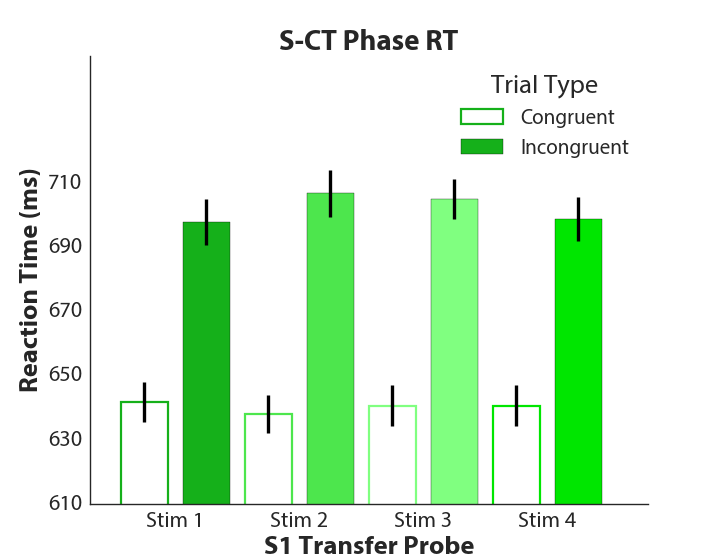

In [209]:
barwidth = 0.75; 
fig, ax = plt.subplots(figsize=(9, 7));
rects1 = ax.bar(0.5,RTanalysis.Stim1C.mean(),barwidth,yerr=RTstderror.Stim1C,ecolor='k',edgecolor=sns.xkcd_rgb['green'],linewidth = 2, facecolor='none',error_kw=dict(lw=3),label='Congruent');
rects2 = ax.bar(1.5,RTanalysis.Stim1IC.mean(),barwidth,color=sns.xkcd_rgb['green'],yerr=RTstderror.Stim1IC,ecolor='k',error_kw=dict(lw=3),label='Incongruent');
rects3 = ax.bar(2.5,RTanalysis.Stim2C.mean(),barwidth,yerr=RTstderror.Stim2C,ecolor='k',edgecolor=(0.3,0.9,0.3),linewidth = 2, facecolor='none',error_kw=dict(lw=3));
rects4 = ax.bar(3.5,RTanalysis.Stim2IC.mean(),barwidth,color=(0.3,0.9,0.3),yerr=RTstderror.Stim2IC,ecolor='k',error_kw=dict(lw=3));
rects5 = ax.bar(4.5,RTanalysis.Stim3C.mean(),barwidth,yerr=RTstderror.Stim3C,ecolor='k',edgecolor=(0.5,1,0.5),linewidth = 2, facecolor='none',error_kw=dict(lw=3));
rects6 = ax.bar(5.5,RTanalysis.Stim3IC.mean(),barwidth,color=(0.5,1,0.5),yerr=RTstderror.Stim3IC,ecolor='k',error_kw=dict(lw=3));
rects7 = ax.bar(6.5,RTanalysis.Stim4C.mean(),barwidth,yerr=RTstderror.Stim4C,ecolor='k',edgecolor=(0,0.9,0),linewidth = 2, facecolor='none',error_kw=dict(lw=3));
rects8 = ax.bar(7.5,RTanalysis.Stim4IC.mean(),barwidth,color=(0,0.9,0),yerr=RTstderror.Stim4IC,ecolor='k',error_kw=dict(lw=3));
sns.set(context='notebook', style='white', font='Myriad Pro', font_scale=2, color_codes=False, rc=None);
ax.set_ylim(610,750);
ax.set_xlim(0,9);
ax.set_xticklabels(('Stim 1', 'Stim 2', 'Stim 3', 'Stim 4'));
ax.set_xticks([1 + barwidth/2, 3 + barwidth/2, 5 + barwidth/2, 7 + barwidth/2]);
ax.set_yticks(np.arange(610, 711, 20));
plt.legend([rects1, rects2], ['Congruent','Incongruent'], loc='upper right',fontsize=18,title='Trial Type');
plt.legend(title='Trial Type',fontsize=19);
plt.title('S-CT Phase RT', fontsize=26,fontweight="bold");
plt.ylabel('Reaction Time (ms)', fontsize=24,fontweight="bold");
plt.xlabel('S1 Transfer Probe', fontsize=24,fontweight="bold");
sns.despine();

plt.show()

<IPython.core.display.Javascript object>


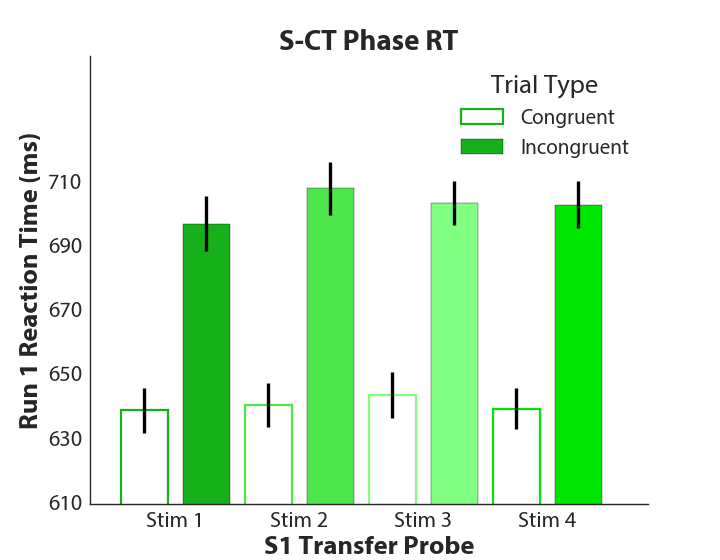

In [210]:
barwidth = 0.75; 
fig, ax = plt.subplots(figsize=(9, 7));
rects1 = ax.bar(0.5,Run1RT.Stim1C.mean(),barwidth,yerr=RTstderror_Run1.Stim1C,ecolor='k',edgecolor=sns.xkcd_rgb['green'],linewidth = 2, facecolor='none',error_kw=dict(lw=3),label='Congruent');
rects2 = ax.bar(1.5,Run1RT.Stim1IC.mean(),barwidth,color=sns.xkcd_rgb['green'],yerr=RTstderror_Run1.Stim1IC,ecolor='k',error_kw=dict(lw=3),label='Incongruent');
rects3 = ax.bar(2.5,Run1RT.Stim2C.mean(),barwidth,yerr=RTstderror_Run1.Stim2C,ecolor='k',edgecolor=(0.3,0.9,0.3),linewidth = 2, facecolor='none',error_kw=dict(lw=3));
rects4 = ax.bar(3.5,Run1RT.Stim2IC.mean(),barwidth,color=(0.3,0.9,0.3),yerr=RTstderror_Run1.Stim2IC,ecolor='k',error_kw=dict(lw=3));
rects5 = ax.bar(4.5,Run1RT.Stim3C.mean(),barwidth,yerr=RTstderror_Run1.Stim3C,ecolor='k',edgecolor=(0.5,1,0.5),linewidth = 2, facecolor='none',error_kw=dict(lw=3));
rects6 = ax.bar(5.5,Run1RT.Stim3IC.mean(),barwidth,color=(0.5,1,0.5),yerr=RTstderror_Run1.Stim3IC,ecolor='k',error_kw=dict(lw=3));
rects7 = ax.bar(6.5,Run1RT.Stim4C.mean(),barwidth,yerr=RTstderror_Run1.Stim4C,ecolor='k',edgecolor=(0,0.9,0),linewidth = 2, facecolor='none',error_kw=dict(lw=3));
rects8 = ax.bar(7.5,Run1RT.Stim4IC.mean(),barwidth,color=(0,0.9,0),yerr=RTstderror_Run1.Stim4IC,ecolor='k',error_kw=dict(lw=3));
sns.set(context='notebook', style='white', font='Myriad Pro', font_scale=2, color_codes=False, rc=None);
ax.set_ylim(610,750);
ax.set_xlim(0,9);
ax.set_xticklabels(('Stim 1', 'Stim 2', 'Stim 3', 'Stim 4'));
ax.set_xticks([1 + barwidth/2, 3 + barwidth/2, 5 + barwidth/2, 7 + barwidth/2]);
ax.set_yticks(np.arange(610, 711, 20));
plt.legend([rects1,rects2], ['Congruent','Incongruent'], loc='upper right',fontsize=18,title='Trial Type');
plt.legend(title='Trial Type',fontsize=19);
plt.title('S-CT Phase RT', fontsize=26,fontweight="bold");
plt.ylabel('Run 1 Reaction Time (ms)', fontsize=24,fontweight="bold");
plt.xlabel('S1 Transfer Probe', fontsize=24,fontweight="bold");
sns.despine();

plt.show()

<IPython.core.display.Javascript object>


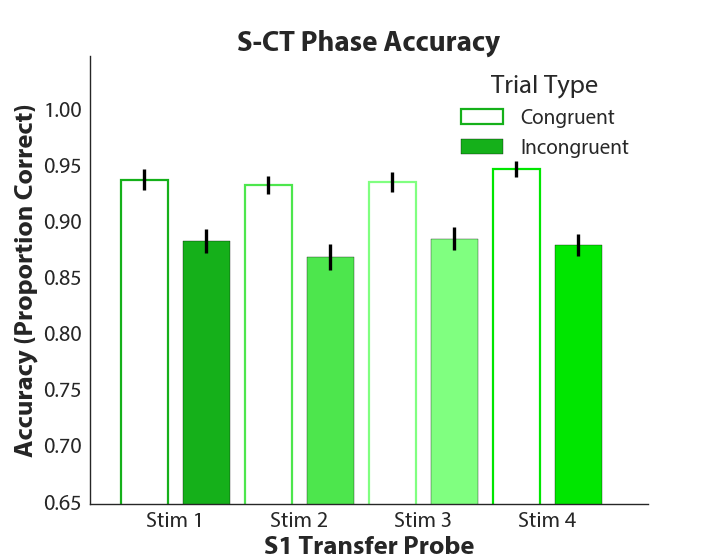

In [211]:
barwidth = 0.75; 
fig, ax = plt.subplots(figsize=(9, 7));
rects1 = ax.bar(0.5,ACCanalysis.Stim1C.mean(),barwidth,yerr=ACCstderror.Stim1C,ecolor='k',edgecolor=sns.xkcd_rgb['green'],linewidth = 2, facecolor='none',error_kw=dict(lw=3),label='Congruent');
rects2 = ax.bar(1.5,ACCanalysis.Stim1IC.mean(),barwidth,color=sns.xkcd_rgb['green'],yerr=ACCstderror.Stim1IC,ecolor='k',error_kw=dict(lw=3),label='Incongruent');
rects3 = ax.bar(2.5,ACCanalysis.Stim2C.mean(),barwidth,yerr=ACCstderror.Stim2C,ecolor='k',edgecolor=(0.3,0.9,0.3),linewidth = 2, facecolor='none',error_kw=dict(lw=3));
rects4 = ax.bar(3.5,ACCanalysis.Stim2IC.mean(),barwidth,color=(0.3,0.9,0.3),yerr=ACCstderror.Stim2IC,ecolor='k',error_kw=dict(lw=3));
rects5 = ax.bar(4.5,ACCanalysis.Stim3C.mean(),barwidth,yerr=ACCstderror.Stim3C,ecolor='k',edgecolor=(0.5,1,0.5),linewidth = 2, facecolor='none',error_kw=dict(lw=3));
rects6 = ax.bar(5.5,ACCanalysis.Stim3IC.mean(),barwidth,color=(0.5,1,0.5),yerr=ACCstderror.Stim3IC,ecolor='k',error_kw=dict(lw=3));
rects7 = ax.bar(6.5,ACCanalysis.Stim4C.mean(),barwidth,yerr=ACCstderror.Stim4C,ecolor='k',edgecolor=(0,0.9,0),linewidth = 2, facecolor='none',error_kw=dict(lw=3));
rects8 = ax.bar(7.5,ACCanalysis.Stim4IC.mean(),barwidth,color=(0,0.9,0),yerr=ACCstderror.Stim4IC,ecolor='k',error_kw=dict(lw=3));
sns.set(context='notebook', style='white', font='Myriad Pro', font_scale=2, color_codes=False, rc=None);
ax.set_ylim(0.65,1.05);
ax.set_xlim(0,9);
ax.set_xticklabels(('Stim 1', 'Stim 2', 'Stim 3', 'Stim 4'));
ax.set_xticks([1 + barwidth/2, 3 + barwidth/2, 5 + barwidth/2, 7 + barwidth/2]);
ax.set_yticks(np.arange(0.65, 1.01, 0.05));
plt.legend([rects1,rects2], ['Congruent','Incongruent'], loc='upper right',fontsize=18,title='Trial Type')
plt.legend(title='Trial Type',fontsize=19)
plt.title('S-CT Phase Accuracy', fontsize=26,fontweight="bold")
plt.ylabel('Accuracy (Proportion Correct)', fontsize=24,fontweight="bold")
plt.xlabel('S1 Transfer Probe', fontsize=24,fontweight="bold")
sns.despine();

plt.show()

<IPython.core.display.Javascript object>


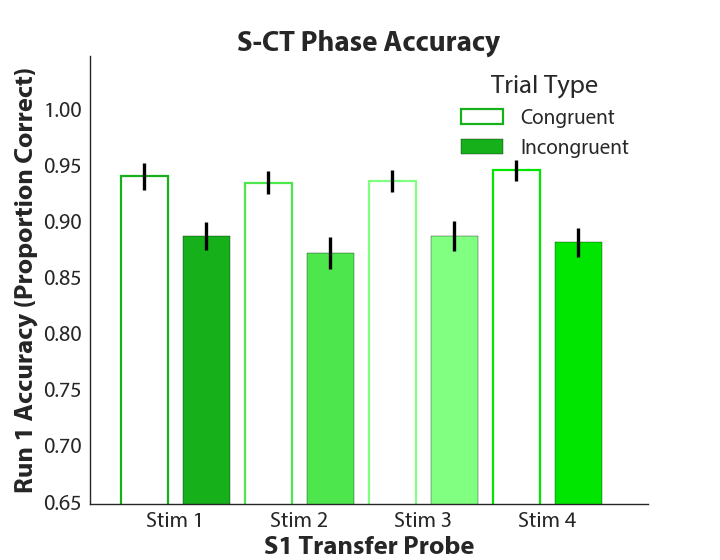

In [212]:
barwidth = 0.75; 
fig, ax = plt.subplots(figsize=(9, 7));
rects1 = ax.bar(0.5,Run1ACC.Stim1C.mean(),barwidth,yerr=ACCstderror_Run1.Stim1C,ecolor='k',edgecolor=sns.xkcd_rgb['green'],linewidth = 2, facecolor='none',error_kw=dict(lw=3),label='Congruent');
rects2 = ax.bar(1.5,Run1ACC.Stim1IC.mean(),barwidth,color=sns.xkcd_rgb['green'],yerr=ACCstderror_Run1.Stim1IC,ecolor='k',error_kw=dict(lw=3),label='Incongruent');
rects3 = ax.bar(2.5,Run1ACC.Stim2C.mean(),barwidth,yerr=ACCstderror_Run1.Stim2C,ecolor='k',edgecolor=(0.3,0.9,0.3),linewidth = 2, facecolor='none',error_kw=dict(lw=3));
rects4 = ax.bar(3.5,Run1ACC.Stim2IC.mean(),barwidth,color=(0.3,0.9,0.3),yerr=ACCstderror_Run1.Stim2IC,ecolor='k',error_kw=dict(lw=3));
rects5 = ax.bar(4.5,Run1ACC.Stim3C.mean(),barwidth,yerr=ACCstderror_Run1.Stim3C,ecolor='k',edgecolor=(0.5,1,0.5),linewidth = 2, facecolor='none',error_kw=dict(lw=3));
rects6 = ax.bar(5.5,Run1ACC.Stim3IC.mean(),barwidth,color=(0.5,1,0.5),yerr=ACCstderror_Run1.Stim3IC,ecolor='k',error_kw=dict(lw=3));
rects7 = ax.bar(6.5,Run1ACC.Stim4C.mean(),barwidth,yerr=ACCstderror_Run1.Stim4C,ecolor='k',edgecolor=(0,0.9,0),linewidth = 2, facecolor='none',error_kw=dict(lw=3));
rects8 = ax.bar(7.5,Run1ACC.Stim4IC.mean(),barwidth,color=(0,0.9,0),yerr=ACCstderror_Run1.Stim4IC,ecolor='k',error_kw=dict(lw=3));
sns.set(context='notebook', style='white', font='Myriad Pro', font_scale=2, color_codes=False, rc=None);
ax.set_ylim(0.65,1.05);
ax.set_xlim(0,9);
ax.set_xticklabels(('Stim 1', 'Stim 2', 'Stim 3', 'Stim 4'));
ax.set_xticks([1 + barwidth/2, 3 + barwidth/2, 5 + barwidth/2, 7 + barwidth/2]);
ax.set_yticks(np.arange(0.65, 1.01, 0.05));
plt.legend([rects1,rects2], ['Congruent','Incongruent'], loc='upper right',fontsize=18,title='Trial Type');
plt.legend(title='Trial Type',fontsize=19);
plt.title('S-CT Phase Accuracy', fontsize=26,fontweight="bold");
plt.ylabel('Run 1 Accuracy (Proportion Correct)', fontsize=24,fontweight="bold");
plt.xlabel('S1 Transfer Probe', fontsize=24,fontweight="bold");
sns.despine();

plt.show()

# Making 95% Confidence Intervals

Now I'm making the Supplementary tables that show our data in full, with 95% CIs accompanying the means.

In [213]:
import statsmodels.stats.api as sms

a = RTanalysis.Stim1C.mean()
sms.DescrStatsW(RTanalysis.Stim1C).tconfint_mean()
#a

(629.61311060648609, 654.18224771949258)

In [214]:
a = RTanalysis.Stim1IC.mean()
sms.DescrStatsW(RTanalysis.Stim1IC).tconfint_mean()
#a

(683.755685539713, 712.50680661315721)

In [215]:
a = RTanalysis.Stim2C.mean()
sms.DescrStatsW(RTanalysis.Stim2C).tconfint_mean()
#a

(626.24003658618744, 649.91913014300758)

In [216]:
a = RTanalysis.Stim2IC.mean()
sms.DescrStatsW(RTanalysis.Stim2IC).tconfint_mean()
#a

(692.36781349118121, 721.70505089462279)

In [217]:
a = RTanalysis.Stim3C.mean()
sms.DescrStatsW(RTanalysis.Stim3C).tconfint_mean()
#a

(628.06477887252083, 653.43744662474376)

In [218]:
a = RTanalysis.Stim3IC.mean()
sms.DescrStatsW(RTanalysis.Stim3IC).tconfint_mean()
#a

(693.02764607507891, 717.51147563723737)

In [219]:
a = RTanalysis.Stim4C.mean()
sms.DescrStatsW(RTanalysis.Stim4C).tconfint_mean()
#a

(627.94443531262755, 653.46045899068372)

In [220]:
a = RTanalysis.Stim4IC.mean()
sms.DescrStatsW(RTanalysis.Stim4IC).tconfint_mean()
#a

(685.37503124000318, 712.64018231015348)

In [221]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 0].Stim1C.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 0].Stim1C).tconfint_mean()
#a

(625.37554590430886, 653.2875765136082)

In [222]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 0].Stim1IC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 0].Stim1IC).tconfint_mean()
#a

(680.72225178638405, 714.52732420839743)

In [223]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 0].Stim2C.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 0].Stim2C).tconfint_mean()
#a

(627.0542627705014, 654.83506099553449)

In [224]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 0].Stim2IC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 0].Stim2IC).tconfint_mean()
#a

(692.08508365436489, 725.21677544543934)

In [225]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 0].Stim3C.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 0].Stim3C).tconfint_mean()
#a

(629.51152838929249, 658.43557967767845)

In [226]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 0].Stim3IC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 0].Stim3IC).tconfint_mean()
#a

(690.31446289405801, 717.86388022401104)

In [227]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 0].Stim4C.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 0].Stim4C).tconfint_mean()
#a

(626.92298722858175, 652.65292057746308)

In [228]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 0].Stim4IC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 0].Stim4IC).tconfint_mean()
#a

(688.75329744521139, 718.43225376157272)

In [229]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 1].Stim1C.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 1].Stim1C).tconfint_mean()
#a

(631.15663424736988, 658.4421480966181)

In [230]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 1].Stim1IC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 1].Stim1IC).tconfint_mean()
#a

(684.30322284861927, 714.36802090002175)

In [231]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 1].Stim2C.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 1].Stim2C).tconfint_mean()
#a

(621.12764467887985, 648.32204003518848)

In [232]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 1].Stim2IC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 1].Stim2IC).tconfint_mean()
#a

(689.24617746164006, 722.81781471057127)

In [233]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 1].Stim3C.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 1].Stim3C).tconfint_mean()
#a

(623.54817661752918, 651.87747026222723)

In [234]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 1].Stim3IC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 1].Stim3IC).tconfint_mean()
#a

(691.20637652834148, 720.3873503688103)

In [235]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 1].Stim4C.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 1].Stim4C).tconfint_mean()
#a

(625.94349283438919, 657.06030146872013)

In [236]:
a = RTrunanalysis.loc[RTrunanalysis['Run'] == 1].Stim4IC.mean()
sms.DescrStatsW(RTrunanalysis.loc[RTrunanalysis['Run'] == 1].Stim4IC).tconfint_mean()
#a

(679.85178105846671, 709.21055858058526)

And for Accuracy...

In [237]:
a = ACCanalysis.Stim1C.mean()
sms.DescrStatsW(ACCanalysis.Stim1C).tconfint_mean()
#a

(0.92169954198062676, 0.95775251281389406)

In [238]:
a = ACCanalysis.Stim1IC.mean()
sms.DescrStatsW(ACCanalysis.Stim1IC).tconfint_mean()
#a

(0.8631339794148124, 0.90672903428381757)

In [239]:
a = ACCanalysis.Stim2C.mean()
sms.DescrStatsW(ACCanalysis.Stim2C).tconfint_mean()
#a

(0.91941535684404496, 0.9504476568545851)

In [240]:
a = ACCanalysis.Stim2IC.mean()
sms.DescrStatsW(ACCanalysis.Stim2IC).tconfint_mean()
#a

(0.84788729037995758, 0.89320860003100122)

In [241]:
a = ACCanalysis.Stim3C.mean()
sms.DescrStatsW(ACCanalysis.Stim3C).tconfint_mean()
#a

(0.9198745961770104, 0.95546786957641394)

In [242]:
a = ACCanalysis.Stim3IC.mean()
sms.DescrStatsW(ACCanalysis.Stim3IC).tconfint_mean()
#a

(0.86706044809198901, 0.906912154647737)

In [243]:
a = ACCanalysis.Stim4C.mean()
sms.DescrStatsW(ACCanalysis.Stim4C).tconfint_mean()
#a

(0.93509457344044256, 0.96353556354585868)

In [244]:
a = ACCanalysis.Stim4IC.mean()
sms.DescrStatsW(ACCanalysis.Stim4IC).tconfint_mean()
#a

(0.86211174524676548, 0.90090195338337176)

In [245]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].Stim1C.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].Stim1C).tconfint_mean()
#a

(0.91820692577449947, 0.96672458107481563)

In [246]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].Stim1IC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].Stim1IC).tconfint_mean()
#a

(0.86397180900119719, 0.91411038277962486)

In [247]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].Stim2C.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].Stim2C).tconfint_mean()
#a

(0.91696581255817389, 0.95700679018155221)

In [248]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].Stim2IC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].Stim2IC).tconfint_mean()
#a

(0.84592397152549337, 0.90202123395395883)

In [249]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].Stim3C.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].Stim3C).tconfint_mean()
#a

(0.91828917030872037, 0.95842315845840287)

In [250]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].Stim3IC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].Stim3IC).tconfint_mean()
#a

(0.86194277932744345, 0.9161394124533786)

In [251]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].Stim4C.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].Stim4C).tconfint_mean()
#a

(0.92966058470936397, 0.9662298262495399)

In [252]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].Stim4IC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 0].Stim4IC).tconfint_mean()
#a

(0.85776343494732399, 0.90935985272390885)

In [253]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].Stim1C.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].Stim1C).tconfint_mean()
#a

(0.91696581255817378, 0.9570067901815521)

In [254]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].Stim1IC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].Stim1IC).tconfint_mean()
#a

(0.84979629356413477, 0.91184754205230356)

In [255]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].Stim2C.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].Stim2C).tconfint_mean()
#a

(0.91227994000710266, 0.95347348465043136)

In [256]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].Stim2IC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].Stim2IC).tconfint_mean()
#a

(0.83961152200742639, 0.89463505333503923)

In [257]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].Stim3C.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].Stim3C).tconfint_mean()
#a

(0.91447697913057591, 0.95949562360915019)

In [258]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].Stim3IC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].Stim3IC).tconfint_mean()
#a

(0.8583658683265516, 0.91149714537207838)

In [259]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].Stim4C.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].Stim4C).tconfint_mean()
#a

(0.93239464723321219, 0.96897521578048662)

In [260]:
a = ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].Stim4IC.mean()
sms.DescrStatsW(ACCrunanalysis.loc[ACCrunanalysis['Run'] == 1].Stim4IC).tconfint_mean()
#a

(0.856460172515075, 0.9024439370739662)